## Importing libraries and reading files

In [1]:
# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [3]:
# Reading loan_table.csv from disk using pandas
loan = pd.read_csv('loan_table.csv')

In [4]:
# Reading borrower_table.csv from disk using pandas
bor = pd.read_csv('borrower_table.csv')

## Data Understanding

### Examining the data

In [5]:
# Observe the loan file
loan.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid
0,19454,investment,2012-03-15,0,NaN
1,496811,investment,2012-01-17,0,NaN
2,929493,other,2012-02-09,0,NaN
3,580653,other,2012-06-27,1,1.0
4,172419,business,2012-05-21,1,0.0


In [6]:
loan.shape

(101100, 5)

In [7]:
# Observe the borrower file
bor.head()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1


In [8]:
bor.shape

(101100, 12)

There are exactly same records in loan file and borrower file with a common column `loan_id`

Before we join both file based on `loan_id` column, lets check if they have exactly same loan ids or not

In [9]:
set(loan.loan_id) == set(bor.loan_id)

True

Now that is out of the way, lets join them in one `DataFrame`

### Joining dataframes

In [10]:
df = loan.join(bor.set_index('loan_id'), on='loan_id')

In [11]:
# Lets check the shape
df.shape

(101100, 16)

In [12]:
# Lets observe visually by looking at the first 5 rows
df.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,19454,investment,2012-03-15,0,NaN,1,NaN,NaN,8600,0.79,1491,6285,1,45200,42,7
1,496811,investment,2012-01-17,0,NaN,1,NaN,NaN,5300,0.52,141,5793,0,0,42,5
2,929493,other,2012-02-09,0,NaN,1,NaN,NaN,0,NaN,660,3232,1,26500,60,4
3,580653,other,2012-06-27,1,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,172419,business,2012-05-21,1,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4


### Exploration

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 16 columns):
loan_id                                            101100 non-null int64
loan_purpose                                       101100 non-null object
date                                               101100 non-null object
loan_granted                                       101100 non-null int64
loan_repaid                                        47654 non-null float64
is_first_loan                                      101100 non-null int64
fully_repaid_previous_loans                        46153 non-null float64
currently_repaying_other_loans                     46153 non-null float64
total_credit_card_limit                            101100 non-null int64
avg_percentage_credit_card_limit_used_last_year    94128 non-null float64
saving_amount                                      101100 non-null int64
checking_amount                                    101100 non-null int64
is_empl

In [14]:
df.describe()

,loan_id,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
count,101100.000000,101100.000000,47654.000000,101100.000000,46153.000000,46153.000000,101100.000000,94128.000000,101100.000000,101100.000000,101100.000000,101100.000000,101100.000000,101100.000000
mean,499666.826726,0.471355,0.644353,0.543492,0.899291,0.364332,4112.743818,0.724140,1799.617616,3177.150821,0.658675,21020.727992,41.491632,3.864748
std,288662.006929,0.499181,0.478714,0.498107,0.300946,0.481247,2129.121462,0.186483,1400.545141,2044.448155,0.474157,18937.581415,12.825570,2.635491
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,250333.750000,0.000000,0.000000,0.000000,1.000000,0.000000,2700.000000,0.600000,834.000000,1706.000000,0.000000,0.000000,32.000000,2.000000
50%,499885.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4100.000000,0.730000,1339.000000,2673.000000,1.000000,21500.000000,41.000000,3.000000
75%,749706.250000,1.000000,1.000000,1.000000,1.000000,1.000000,5500.000000,0.860000,2409.000000,4241.000000,1.000000,35300.000000,50.000000,6.000000
max,999987.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13500.000000,1.090000,10641.000000,13906.000000,1.000000,97200.000000,79.000000,8.000000


#### Loan Purpose

In [15]:
df.loan_purpose.value_counts(dropna=False)

home               24314
business           21707
investment         21484
emergency_funds    18091
other              15504
Name: loan_purpose, dtype: int64

We will encode categorical features differently for different algorithms later.

#### Drop Date

In [16]:
# Date does not help much in deciding if loan offered will be repaid or not
df.drop('date', axis=1, inplace=True)

#### Loan granted

In [17]:
# loan_granted
df.loan_granted.value_counts(dropna=False)

0    53446
1    47654
Name: loan_granted, dtype: int64

We will take `loan_granted = 1` as the train data and `loan_granted = 0` as not granted yet as the test data.

#### Loan Repaid

In [18]:
# loan_repaid
df.loan_repaid.value_counts(dropna=False)

NaN     53446
 1.0    30706
 0.0    16948
Name: loan_repaid, dtype: int64

All records with NaN - the nulls represent the same records where loan has not been granted so loan_repaid does not make sense.

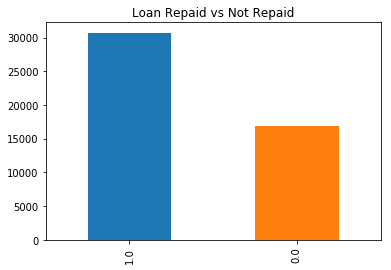

In [19]:
# Loan repaid vs not repaid comparison plot
df.loan_repaid.value_counts().plot.bar(title='Loan Repaid vs Not Repaid')

#### Is first loan

In [20]:
df.is_first_loan.value_counts(dropna=False)

1    54947
0    46153
Name: is_first_loan, dtype: int64

#### Fully repaid previous loan

In [21]:
df.fully_repaid_previous_loans.value_counts(dropna=False)

NaN     54947
 1.0    41505
 0.0     4648
Name: fully_repaid_previous_loans, dtype: int64

Fully repaid previous loan does not make sense for people where this is first loan. So they are null here. We will drop isfirstloan column and embed that information in this feature only.

In [22]:
df.drop('is_first_loan', axis=1, inplace=True)

#### Currently repaying other loans

In [23]:
df.currently_repaying_other_loans.value_counts(dropna=False)

NaN     54947
 0.0    29338
 1.0    16815
Name: currently_repaying_other_loans, dtype: int64

Same thing as previous feature. But here we will simply replace NaNs with 0 as people with first loan won't be paying any other loans.

In [24]:
df.currently_repaying_other_loans.fillna(value=0, inplace=True)

#### Total credit card limit

In [25]:
sum(df.total_credit_card_limit.isna())

0

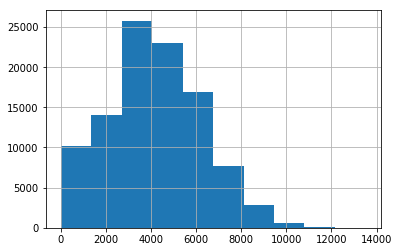

In [26]:
# Using histogram since it is a continuous feature
df.total_credit_card_limit.hist()

So this is a positively skewed distribution and generally observed when money metrics. Simple way to deal with this is take log or sqrt.

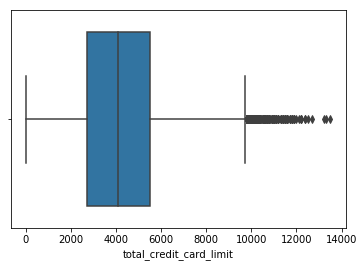

In [27]:
sns.boxplot(data=df, x='total_credit_card_limit')

Above box plot shows the outliers after right tail. Models tend to perform when data is normally distributed and with minimum outliers.

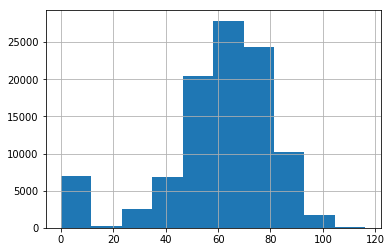

In [28]:
df.total_credit_card_limit.apply(lambda x: math.sqrt(x)).hist()

In [29]:
to_sqrt = []
to_sqrt.append('total_credit_card_limit')

#### Avg %age credit card limit used last year

In [30]:
sum(df.avg_percentage_credit_card_limit_used_last_year.isna())

6972

Most likly people with no credit card will have a no data. We can impute these nulls with 0 but it is also possible that they have credit and we simply don't have the data. Lets see the distribution first.

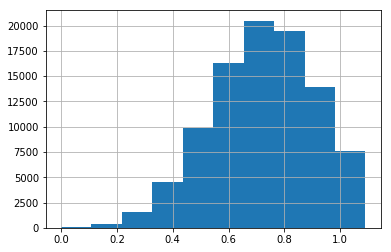

In [31]:
df.avg_percentage_credit_card_limit_used_last_year.hist()

In [32]:
# Investigate guys with nulls as avg %age credit card usage.
people_no_credit_card = df.loc[df.avg_percentage_credit_card_limit_used_last_year.isna(),
                               ['total_credit_card_limit','avg_percentage_credit_card_limit_used_last_year']]

In [33]:
sum(people_no_credit_card.total_credit_card_limit)

0

We are sure now that all people with avg %age credit card usage as null has a credit limit of zero. Means no credit card. We will impute avg credit card usage of these people as 0.

In [34]:
df.avg_percentage_credit_card_limit_used_last_year.fillna(value=0, inplace=True)

#### Saving amount

In [35]:
sum(df.saving_amount.isna())

0

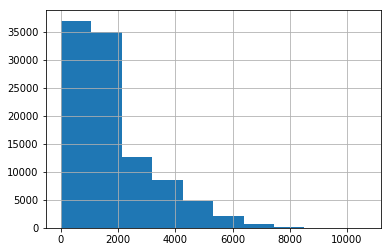

In [36]:
# Lets look at the distribution of the saving amount
df.saving_amount.hist()

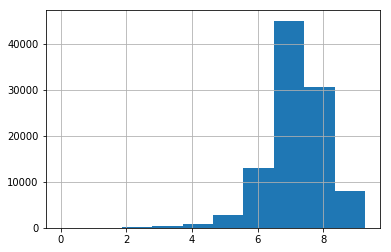

In [37]:
# Lets fix that heavily skewed distribution by taking log.
df.saving_amount.apply(lambda x:math.log(x+1)).hist()

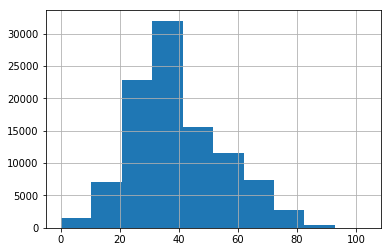

In [38]:
# Log is not the best idea here. Lets try square root.
df.saving_amount.apply(lambda x:math.sqrt(x)).hist()

This is good enough distribution. So we will apply square root transformation to the saving amount feature.

In [39]:
to_sqrt.append('saving_amount')

#### Checking amount

In [40]:
sum(df.checking_amount.isna())

0

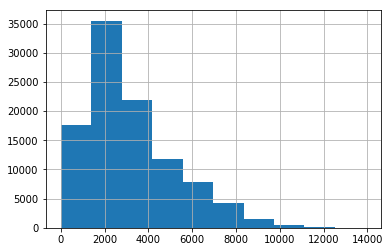

In [41]:
# Lets look at the distribution of the checking amount
df.checking_amount.hist()

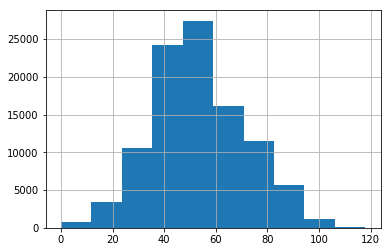

In [42]:
# Lets try square root first here.
df.checking_amount.apply(lambda x:math.sqrt(x)).hist()

In [43]:
to_sqrt.append('checking_amount')

#### Is employed

In [44]:
df.is_employed.value_counts(dropna=False)

1    66592
0    34508
Name: is_employed, dtype: int64

#### Yearly salary

In [45]:
sum(df.yearly_salary.isna())

0

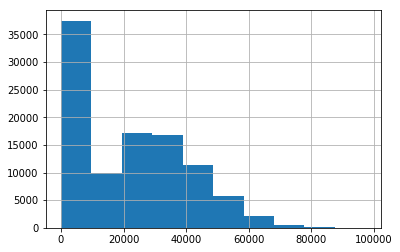

In [46]:
df.yearly_salary.hist()

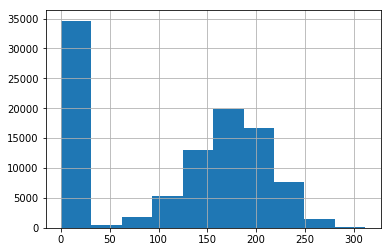

In [47]:
df.yearly_salary.apply(lambda x: math.sqrt(x)).hist()

Here the number of people with salary 0 is very high as they are not employed. But since we have that is_employed categorical feature. Model should learn that some cases are not evaluated based on salary. For example students get loans based on admission to good colleges and their future prospects.

In [48]:
to_sqrt.append('yearly_salary')

#### Age

In [49]:
sum(df.age.isna())

0

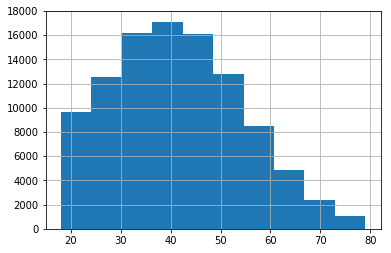

In [50]:
df.age.hist()

This looks okay.

#### Dependent number

In [51]:
df.dependent_number.value_counts(dropna=False)

1    20050
8    19818
2    18153
3    13150
4     9730
5     7257
6     5399
7     4111
0     3432
Name: dependent_number, dtype: int64

## Data Preparation

### Dividing data into train and test

We generally use `train_test_split` from sklearn to do this but in this case we already have people whose loans are yet to be granted. So we make that as our test data. 

In [52]:
X_train = df.loc[df.loan_granted==1,:]

In [53]:
y_train = X_train.loan_repaid

In [54]:
X_train = X_train.drop(labels=['loan_repaid','loan_granted'],axis=1)

In [55]:
X_test = df.loc[df.loan_granted==0,:]

In [56]:
# Since we don't know if these loans were ever granted and how did they turned out. We don't have a Truth value for these.
# y_test

In [57]:
X_test = X_test.drop(labels=['loan_repaid','loan_granted'], axis=1)

### Dividing into train and validation

Since we don't have an actual test data to check our model peformance against. We will carve a small validation set which can be used to check accuracy after model is built.

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=101)

### Transformations

In [60]:
# Separately saving teh loan ids for later use
X_train_loan_ids = X_train.pop('loan_id')
X_test_loan_ids = X_test.pop('loan_id')
X_val_loan_ids = X_val.pop('loan_id')

In [61]:
# A little index cleanup for minimal error
X_train_loan_ids.reset_index(inplace=True, drop=True)
X_test_loan_ids.reset_index(inplace=True, drop=True)
X_val_loan_ids.reset_index(inplace=True, drop=True)

In [62]:
# A little index cleanup for minimal error
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
X_val.reset_index(inplace=True, drop=True)

In [63]:
def common_tranformations(a):
    
    a[to_sqrt]= a[to_sqrt].apply(lambda x: np.sqrt(x))
        
    return a

In [64]:
# Applying transformations
X_train = common_tranformations(X_train)
X_test  = common_tranformations(X_test)
X_val   = common_tranformations(X_val)

In [65]:
# This creates a python deep copy of pandas dataframe
# This is for second algorithm since we are using little differnt encodings there
X_train_rf = X_train.copy()
X_test_rf = X_test.copy()
X_val_rf = X_val.copy()

## Data Modelling

### Non-Tree based Algorithm - KNN classifier

K nearest neighbour classifier was chosen to set a baseline performace algorithm as it will simply decide people with similar characterics will act similarly. So if new customer having similar data to customers who reapy the loan comes for a loan can be expected to repay and not charge off. There were categorical features like is employed or first loan and loan purpose, so even using one hot encoding will leave us with an less than optimal model if we use logistic regression. Logistic regression with Principal Component Analysis and careful feature selection after checking Multicollinearity may yeild a good result with lesser features. Also, I wanted to try KNN classifier here.

#### Data Transformations
We will use One Hot Encoding for all categorical features since they work well with non tree based algorithms.

In [66]:
# Taking care of the fully_repaid_previous_loan feature
def knn_prev_loan_encoder(a):
    
    b = pd.get_dummies(data=a['loan_purpose'],prefix='purpose')
    a = pd.concat([a,b], axis=1)
    b = pd.get_dummies(data=a['fully_repaid_previous_loans'], dummy_na=True, prefix='prev_loan')
    a = pd.concat([a,b], axis=1)
    a = a.drop(['fully_repaid_previous_loans','loan_purpose'], axis=1)
    
    return a

In [67]:
X_train = knn_prev_loan_encoder(X_train)
X_test = knn_prev_loan_encoder(X_test)
X_val = knn_prev_loan_encoder(X_val)

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
X_train = scaler.fit_transform(X_train)

C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [71]:
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)

C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


#### Model training

In [72]:
# KNN grid search cv parameters
knn_params = {'n_neighbors':[5,9,11], 'leaf_size':[20, 25, 30]}

In [73]:
# Fitting the model here
from sklearn.neighbors import KNeighborsClassifier
grid = GridSearchCV(KNeighborsClassifier(), param_grid=knn_params, cv=5, verbose=10, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  35 out of  45 | elapsed:  2.9min remaining:   49.9s
[Parallel(n_jobs=-1)]: Done  40 out of  45 | elapsed:  3.1min remaining:   22.9s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [5, 9, 11], 'leaf_size': [20, 25, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [74]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [75]:
# Using best model found
knn = grid.best_estimator_

In [76]:
# Training best model on complete train data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

### Model Evaluation 

In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix as cm

In [78]:
def roc_plot(pred_probs, y_true, typeofmodel):
        
    fpr, tpr, thresholds = roc_curve(y_true.values, pred_probs[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, color='green', lw=2, label=typeofmodel+' ROC area = %0.2f)' % roc_auc)
    plt.legend(loc="lower right")
    plt.show()

#### Performance on train set.

In [79]:
pred = knn.predict(X_train)

In [80]:
# Confusion Matrix
cm(y_train, pred)

array([[12546,  1002],
       [ 2359, 22216]], dtype=int64)

In [81]:
pred_probs = knn.predict_proba(X_train)

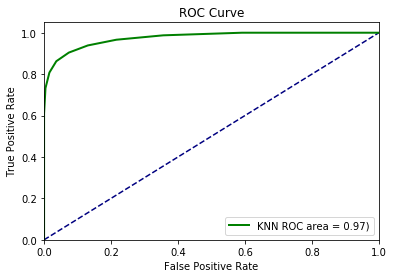

In [82]:
# Lets check how good the fit is on the Train dataset to avoid underfitting if any.
roc_plot(pred_probs, y_train, 'KNN')

The model seems ok and atleast it has learnt from dataset - Not Underfitted model

#### Performace on validation set - REAL PERFORMANCE

In [83]:
# Predictions on validation set
pred = knn.predict(X_val)

In [84]:
# Confusion Matrix
cm(y_val, pred)

array([[2984,  416],
       [ 601, 5530]], dtype=int64)

In [85]:
## Prediction probabilities on test set
pred_probs = knn.predict_proba(X_val)

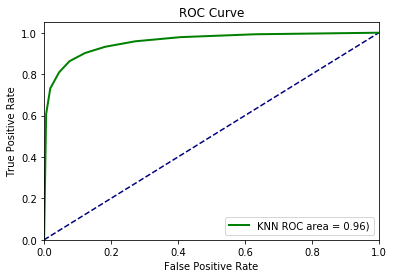

In [86]:
# ROC curve
roc_plot(pred_probs, y_val, 'KNN')

### Tree based Model - Random Forest

Random Forest Classifier performs well on a variety of data and it has best performance. It has many advantages over other models like it does not suffers from Dimensionality problem and A well tuning forest can give state of the art predictions. Although the interpretation of such a model is not that good. Again in our case, If a bank uses this model and really wants to understand its algorithm then it can be done by providing a sorted feature importance list. 

#### Data transformations

Fully repaid previous loans can be label encoded as-<br>
1   - loan repaid - Positive point for borrower<br>
0   - loan not repaid - Negative point for borrower<br>
0.5 - first loan - Neutral with respect to borrower

In [87]:
# Taking care of the fully_repaid_previous_loan feature
def rfc_prev_loan_encoder(a):
    
    a.loc[a.fully_repaid_previous_loans.isna(),'fully_repaid_previous_loans'] = 0.5
    purpose_map = {'other':0, 'business': 1, 'investment': 2, 'emergency_funds': 3, 'home': 4}
    a.loan_purpose = a.loan_purpose.map(purpose_map)
    
    return a

In [88]:
X_train_rf = rfc_prev_loan_encoder(X_train_rf)

In [89]:
X_test_rf = rfc_prev_loan_encoder(X_test_rf)
X_val_rf = rfc_prev_loan_encoder(X_val_rf)

#### Model Training

In [90]:
rfc_params = {'max_depth':[3,5,7,9,11,13,15]}

In [91]:
from sklearn.ensemble import RandomForestClassifier
grid = GridSearchCV(RandomForestClassifier(oob_score=True), param_grid=rfc_params, cv=5, verbose=10, n_jobs=-1)
grid.fit(X_train_rf, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  24 out of  35 | elapsed:    1.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    1.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  32 out of  35 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.9s finished
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7, 9, 11, 13, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [92]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [93]:
# Using best model found
rfc = grid.best_estimator_

In [94]:
# Training best model on complete train data
rfc.fit(X_train_rf, y_train)

C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

### Model Evaluation 

#### Performance on train set

In [95]:
pred = rfc.predict(X_train_rf)

In [96]:
# Confusion Matrix
cm(y_train, pred)

array([[12756,   792],
       [ 1531, 23044]], dtype=int64)

In [97]:
pred_probs = rfc.predict_proba(X_train_rf)

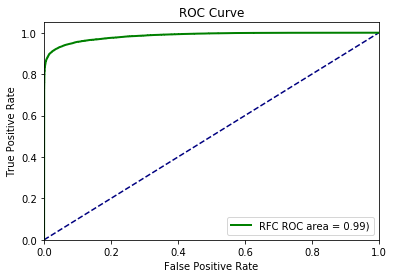

In [98]:
roc_plot(pred_probs, y_train, 'RFC')

#### Performance on validation set - REAL Performance

In [99]:
pred = rfc.predict(X_val_rf)

In [100]:
# Confusion Matrix
cm(y_val, pred)

array([[3074,  326],
       [ 441, 5690]], dtype=int64)

In [101]:
pred_probs = rfc.predict_proba(X_val_rf)

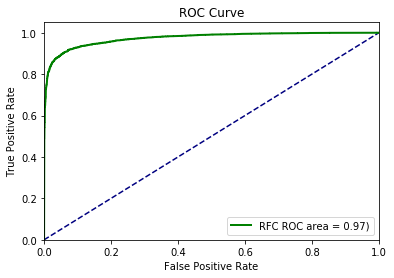

In [102]:
roc_plot(pred_probs, y_val, 'RFC')

`Train AUC score`   `Test AUC Score`<br>
`KNN model` --   0.97    ---               0.96<br>
`RFC model` --   0.99    ---               0.97

It looks like RFC model is a bit overfitted as we see 0.02 decrease in AUC score when tested on unseen data. But still it performs better than KNN model. It can be further optimized by a better cross validation and hyperparameter tuning.
If we throw in some really nice feature engineering then the model AUC score of 0.99 on unseen data can be achieved too.

## Final Predictions

Using Random Forest model for final predictions as it has better performance.

In [103]:
results = pd.Series(rfc.predict(X_test_rf))

In [104]:
result = pd.DataFrame({'loan_id': X_test_loan_ids, 'Predictions': results})

In [105]:
result.head()

,loan_id,Predictions
0,19454,1.0
1,496811,1.0
2,929493,0.0
3,77085,0.0
4,422392,0.0


In [107]:
result.to_csv('resuts.csv',index=False)

To get maximum profits, banks should definitely provide loans to loan_ids with predictions 1 and scrutinize other applicants with prediction 0. They can decide the mix of loans to provide based on their appetite. We can help bank further in by providing the prediction probabilites instead.